# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing all of sampling methods implemented by us.

**We load our methods from SamplingLIB and other requiered libraries**

In [30]:
import SamplingLIB as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **We create testing data**

We create a few distribution function to demonstrate our methods on.

### **Modified Normal distribution (dim=1)**

In [31]:
def M_normal_posterior(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)
    
noramal_dimension = 1  # dimension of the parametr
    
normal = sp.Sampling(posterior=M_normal_posterior, parametr_dimension=noramal_dimension)

### **Donut distribution (dim=2)**

In [32]:
# Inputs:
donut_dim = 2  # dimension of the parametr
donut_mu = np.array([0.5, 1.0])  # prior mean

donut_sigma = 1.0  # prior standard deviation
def donut_G(u):  # forward model
    return (u[0]**2+u[1]**2)

donut_y = 2.0  # observation
donut_gamma = 0.5  # noise standard deviation

def donut_posterior(u): # Unnormalized posterior
    return np.exp(-((donut_y-donut_G(u))**2)/(2*donut_gamma**2)-np.dot(u-donut_mu, u-donut_mu)/(2*donut_sigma**2))

# Sampling instace creation
donut = sp.Sampling(posterior=donut_posterior, parametr_dimension=donut_dim)

### **Rosenbrock (Banana) distribution (dim=2)**

In [33]:
banana_dim = 2  # dimension of the parametr
banana_mu = np.array([2.0, 1.0])  # prior mean

banana_sigma = 1.0  # prior standard deviation
def banana_G(u):  # forward model
    a = 1.0
    b = 100.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

banana_y = 10.0  # observation
banana_gamma = 1.0  # noise standard deviation

def banana_posterior(u): # Unnormalized posterior
    return np.exp(-((banana_y-banana_G(u))**2)/(2*banana_gamma**2)-np.dot(u-banana_mu, u-banana_mu)/(2*banana_sigma**2))

# Sampling instace creation
banana = sp.Sampling(posterior=banana_posterior, parametr_dimension=banana_dim)

### **Wave distribution (dim=2)**

In [34]:
# def hard_G(u):  # forward model
#    return np.sin(np.cos(np.tan(u[0]))) * np.sin(np.cos(np.tan(u[1])))

In [35]:
wave_dim = 2  # dimension of the parametr
wave_mu = np.array([0.0, 0.0])  # prior mean

wave_sigma = 1.0  # prior standard deviation
def wave_G(u):  # forward model
    a = 1.0
    b = 1.0
    return (a * np.sin(u[0])) + (b * np.cos(u[1]))

wave_y = 1.0  # observation
wave_gamma = 1.0  # noise standard deviation

def wave_posterior(u): # Unnormalized posterior
    return np.exp(-((wave_y-wave_G(u))**2)/(2*wave_gamma**2)-np.dot(u-wave_mu, u-wave_mu)/(2*wave_sigma**2))

# Sampling instace creation
wave = sp.Sampling(posterior=wave_posterior, parametr_dimension=wave_dim)

## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH method.

**MH parametrs for testing**

In [36]:
MH_N = 50000  # number of samples
def MH_proposal_distribution(mu): return np.random.normal(mu, 1.0)  # proposal distribution function
MH_burnin = 0.2 # burnin period

### **Modified Normal distribution (dim=1)**

**M_normal parametrs for testing**

In [37]:
normal_initial_MH = 1

**Calling the method**

In [38]:
normal_samples_MH = normal.MH(N=MH_N, initial=normal_initial_MH, proposal_distribution=MH_proposal_distribution, burnin=MH_burnin)

**Visualization of obtained samples**

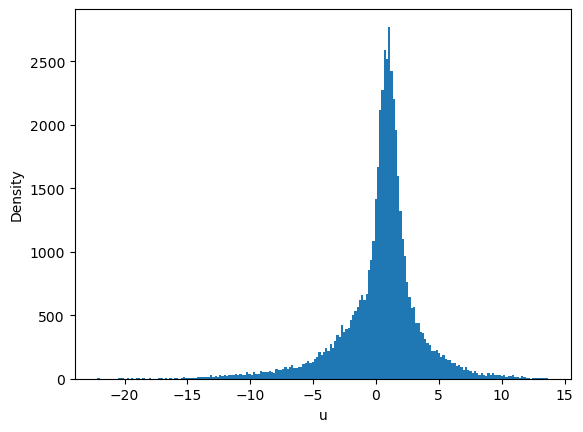

In [39]:
normal.visualize(normal_samples_MH)

### **Donut distribution (dim=2)**

**Donut parametrs for testing**

In [40]:
donut_initial_MH = np.array([2.0, 3.0])  # initial sample

**Calling the method**

In [41]:
donut_samples_MH = donut.MH(N=MH_N, initial=donut_initial_MH, proposal_distribution=MH_proposal_distribution, burnin=MH_burnin)

**Visualization of obtained samples**

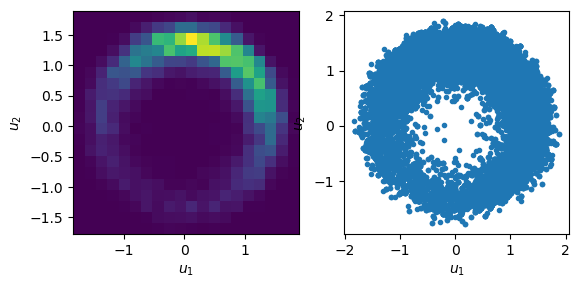

In [42]:
donut.visualize(donut_samples_MH)

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [43]:
banana_initial_MH = np.array([2.0, 1.0])  # initial sample

**Calling the method**

In [44]:
banana_samples_MH, banana_acc_rate_MH = banana.MH(N=MH_N, 
                                                  initial=banana_initial_MH, 
                                                  proposal_distribution=MH_proposal_distribution, 
                                                  burnin=MH_burnin, 
                                                  acc_rate=True)

**Visualization of obtained samples**

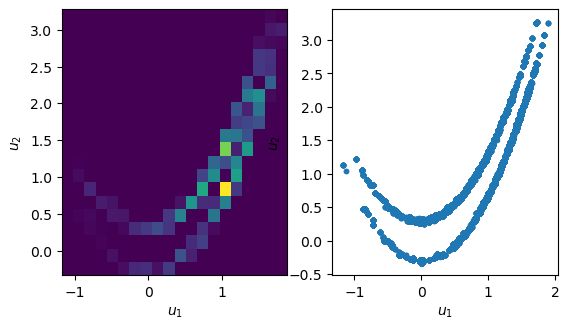

In [45]:
banana.visualize(banana_samples_MH)

**Eficiency of the sampling method**

In [46]:
print("Acceptance rate for the banana distribution: ", banana_acc_rate_MH * 100, "%")

Acceptance rate for the banana distribution:  17.918 %


## **Adaptive Metropolis**

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [47]:
banana_initial_AM = np.array([2.0, 3.0])  # initial sample

**Calling the method**

In [48]:
banana_samples_AM, banana_acc_rate_AM, banana_cov_AM = banana.AM(N=MH_N, 
                                                                 initial=banana_initial_AM, 
                                                                 proposal_cov=np.eye(banana_dim), 
                                                                 burnin=MH_burnin,
                                                                 acc_rate=True,
                                                                 cov_matrix=True)

**Visualization of obtained samples**

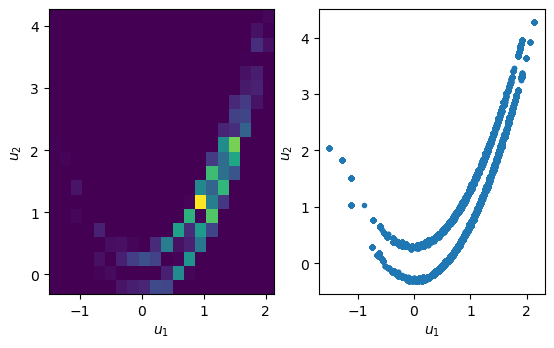

In [49]:
banana.visualize(banana_samples_AM)

**Efficienty of the sampling method**

In [50]:
print("Acceptance rate for the banana distribution: ", banana_acc_rate_AM * 100, "%")

Acceptance rate for the banana distribution:  5.318 %


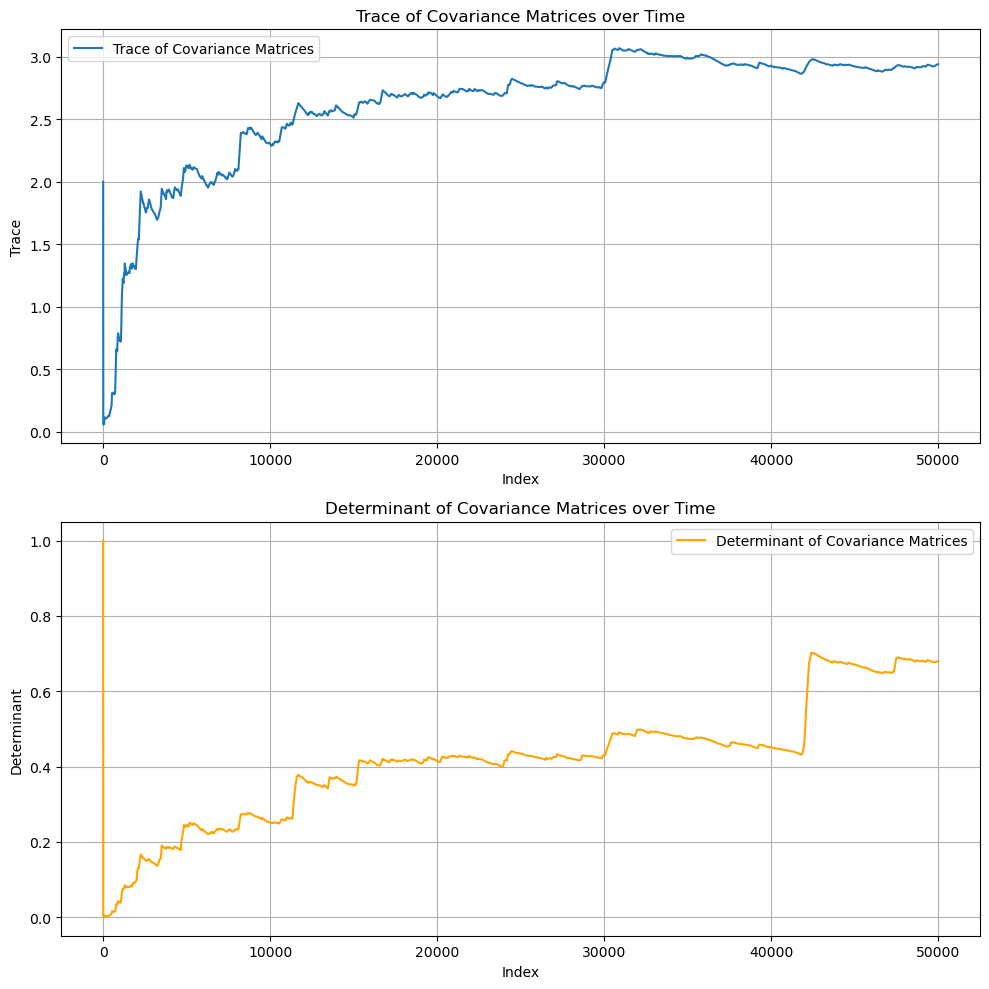

In [51]:
# Compute the trace of each covariance matrix
traces = [np.trace(matrix) for matrix in banana_cov_AM]

# Compute the determinant of each covariance matrix (optional)
determinants = [np.linalg.det(matrix) for matrix in banana_cov_AM]

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the trace of each covariance matrix
axs[0].plot(traces, label='Trace of Covariance Matrices')
axs[0].set_title('Trace of Covariance Matrices over Time')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Trace')
axs[0].legend()
axs[0].grid(True)

# Plot the determinant of each covariance matrix
axs[1].plot(determinants, label='Determinant of Covariance Matrices', color='orange')
axs[1].set_title('Determinant of Covariance Matrices over Time')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Determinant')
axs[1].legend()
axs[1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## **DRAM**

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [52]:
banana_initial_DRAM = np.array([2.0, 1.0])  # initial sample

In [53]:
banana_samples_DRAM, banana_acc_rate_DRAM, banana_cov_DRAM = banana.DRAM(N=MH_N, 
                                                                         initial=banana_initial_DRAM, 
                                                                         proposal_cov=np.eye(banana_dim), 
                                                                         burnin=MH_burnin,
                                                                         acc_rate=True,
                                                                         cov_matrix=True)

**Visualization of obtained samples**

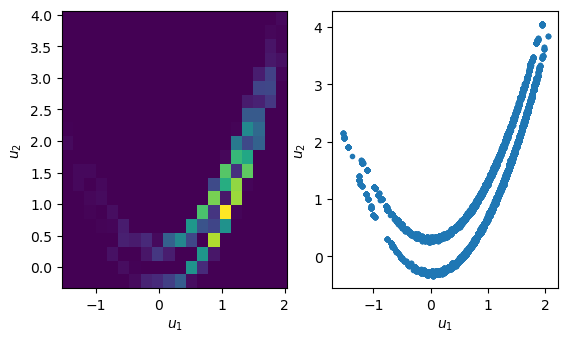

In [54]:
banana.visualize(banana_samples_DRAM)

## **DRAM**

### **Wave distribution (dim=2)**

In [55]:
wave_initial_DREAM = np.random.rand(10, 2)  # initial sample

In [59]:
wave_samples_DREAM, wave_acc_rate_DREAM = donut.DREAM(N=MH_N, 
                                                     initial=wave_initial_DREAM, 
                                                     burnin=MH_burnin,
                                                     delta=3,
                                                     CR=0.9,
                                                     chains=10)

In [ ]:
wave.visualize(wave_samples_DREAM)

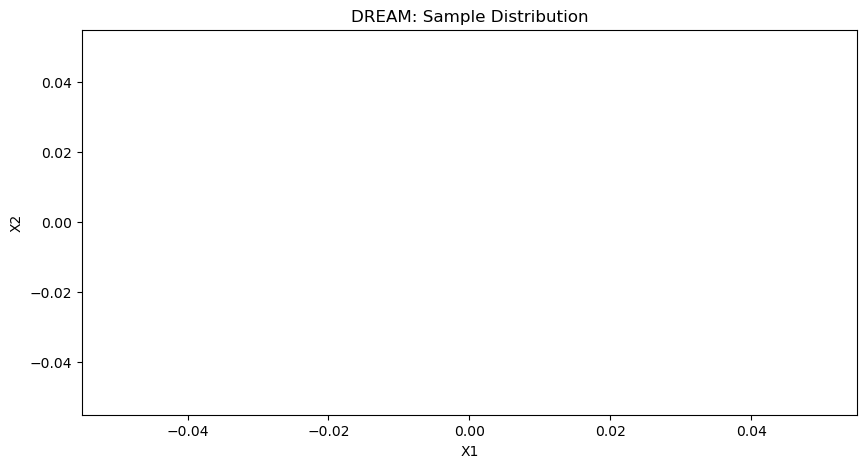

DREAM Average Acceptance Rate: 1.00


In [61]:
plt.figure(figsize=(10, 5))
for i in range(10):  # Plot the first 10 chains
    plt.plot(wave_samples_DREAM[:, i, 0], wave_samples_DREAM[:, i, 1], 'o', alpha=0.3)
plt.title('DREAM: Sample Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

print(f"DREAM Average Acceptance Rate: {np.mean(wave_acc_rate_DREAM):.2f}")

In [65]:
samples_dream, acc_rate_dream = donut.DREAM(N=50000, initial=np.random.rand(20, 2), burnin=0.1, delta=3, CR=0.9, chains=20)

C:\Users\valho\AppData\Local\Temp\ipykernel_2836\1099064399.py:13: RuntimeWarning: overflow encountered in scalar divide
  return np.exp(-((donut_y-donut_G(u))**2)/(2*donut_gamma**2)-np.dot(u-donut_mu, u-donut_mu)/(2*donut_sigma**2))
C:\Users\valho\AppData\Local\Temp\ipykernel_2836\1099064399.py:13: RuntimeWarning: overflow encountered in scalar power
  return np.exp(-((donut_y-donut_G(u))**2)/(2*donut_gamma**2)-np.dot(u-donut_mu, u-donut_mu)/(2*donut_sigma**2))
C:\Users\valho\AppData\Local\Temp\ipykernel_2836\1099064399.py:7: RuntimeWarning: overflow encountered in scalar power
  return (u[0]**2+u[1]**2)
C:\Users\valho\AppData\Local\Temp\ipykernel_2836\1099064399.py:7: RuntimeWarning: overflow encountered in scalar add
  return (u[0]**2+u[1]**2)
g:\ProgramFiles\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:402: Ru

In [66]:
samples_dream

array([[[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       ...,

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]]])